In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lec6_graphs as afx
import seaborn as sns

warnings.simplefilter('ignore')
plt.rcParams['figure.figsize'] = (20,20)
plt.style.use('seaborn')

In [2]:
df = pd.read_csv('diabetes.csv').drop('Unnamed: 0',axis=1)

In [3]:
df.head()

,class,glucose,insulin,sspg
0,Normal,80,356,124
1,Normal,97,289,117
2,Normal,105,319,143
3,Normal,90,356,199
4,Normal,90,323,240


In [4]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import classification_report

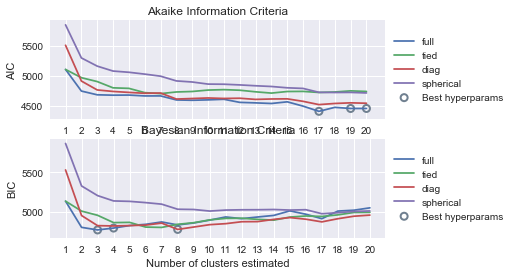

In [5]:
afx.gmm_information_criteria_report(df.loc[:,'glucose':'sspg'], k=np.arange(1,21))

In [6]:
x_mat = df.loc[:,'glucose':'sspg']
X = StandardScaler().fit_transform(x_mat)
df['y'] = LabelEncoder().fit_transform(df['class'])
X_train , X_test, y_train , y_test  = train_test_split(x_mat,df['y'], random_state = 11238,test_size=0.33)

In [7]:
gmm = GaussianMixture(n_components=3,covariance_type='full',random_state=323).fit(X_train)

In [15]:
predict_classes_gmm = gmm.predict(X_test) # pk al ser generativo solo usa el X ?
print(classification_report(y_test,predict_classes_gmm))

              precision    recall  f1-score   support

           0       1.00      0.23      0.38        13
           1       0.69      1.00      0.81        24
           2       1.00      0.91      0.95        11

   micro avg       0.77      0.77      0.77        48
   macro avg       0.90      0.71      0.71        48
weighted avg       0.84      0.77      0.73        48



In [9]:
for i , n in enumerate(df['class'].unique()):
    print("Ponderador para la clase {}: {}".format(i,gmm.weights_[i]))
    for j,k in enumerate(x_mat.columns):
        print("Media {}: {}".format(k,gmm.means_[i][j]))
        print("Covarianza {}: {}".format(k,gmm.covariances_[i][j]))
    print('\n',50*'=','\n')
        

Ponderador para la clase 0: 0.06586517006748532
Media glucose: 105.54170382989925
Covarianza glucose: [100.26897676 442.06484176  77.49088075]
Media insulin: 500.31443784162855
Covarianza insulin: [ 442.06484176 3379.994771   2748.59545605]
Media sspg: 553.5963541078604
Covarianza sspg: [   77.49088075  2748.59545605 12920.54072993]


Ponderador para la clase 1: 0.7446123260775241
Media glucose: 94.65877758969272
Covarianza glucose: [ 145.36214155 1030.62093116  -80.37136919]
Media insulin: 395.8184949029248
Covarianza insulin: [ 1030.62093116 12125.72347305   259.32470541]
Media sspg: 181.49538559323653
Covarianza sspg: [ -80.37136919  259.32470541 5324.64643257]


Ponderador para la clase 2: 0.18952250385499034
Media glucose: 225.457836129145
Covarianza glucose: [ 5551.79432201 20721.82134318 -2440.60057109]
Media insulin: 1072.0698044759647
Covarianza insulin: [20721.82134318 84466.95339276 -9576.84361164]
Media sspg: 75.72896803119646
Covarianza sspg: [-2440.60057109 -9576.84361164

In [10]:
print("Densidades de clase inferida: ", gmm.weights_.round(3))

Densidades de clase inferida:  [0.066 0.745 0.19 ]


In [18]:
gmm.predict_proba(X).round(3)[50:70] #why?

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

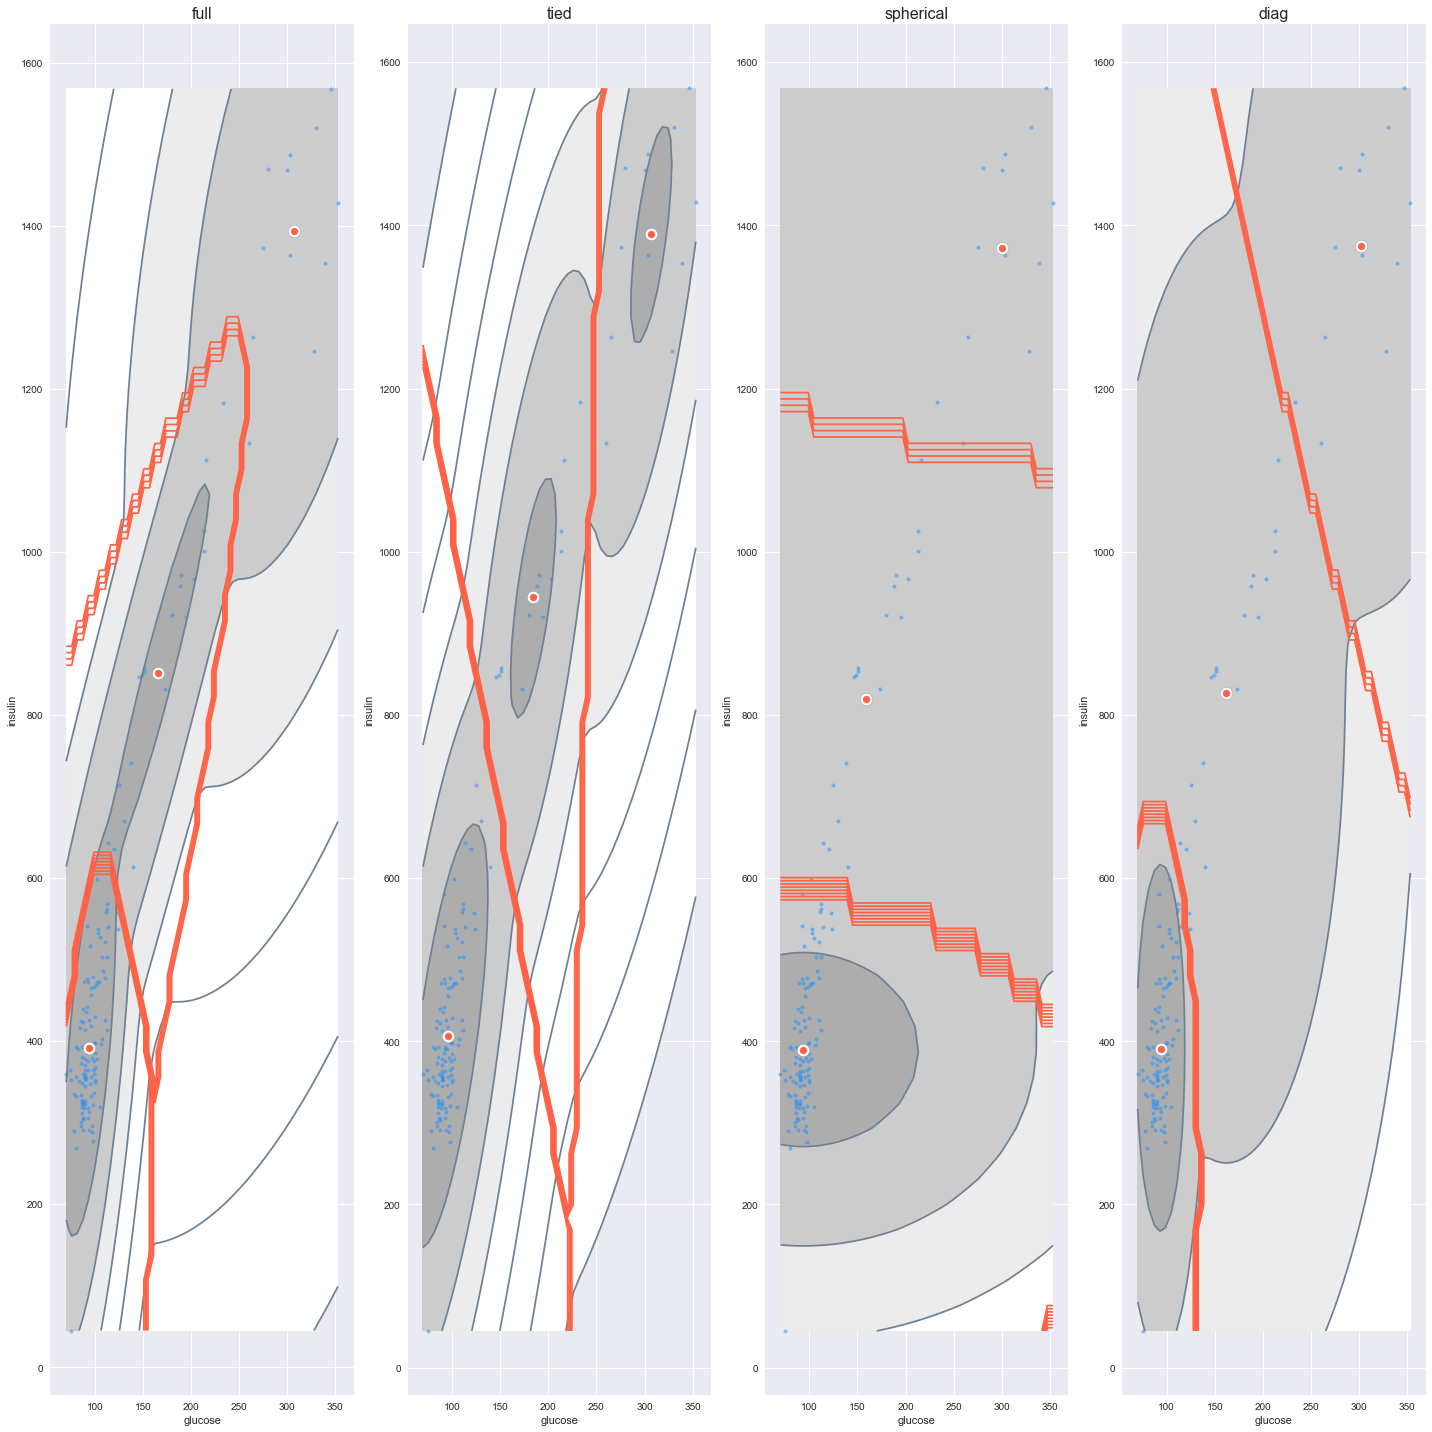

In [21]:
plt.rcParams['figure.figsize'] = (20,20)
X = df.loc[:,['glucose','insulin']]
covar_candidate = ['full','tied','spherical','diag']

for index , varname in enumerate(covar_candidate):
    plt.subplot(1,4, index+1)
    afx.plot_gaussian_ellipses(GaussianMixture(n_components=3, covariance_type=varname , random_state=323).fit(X), X=X)
    plt.tight_layout();plt.title(varname,fontsize=16)

In [23]:
for covar in covar_candidate:
    tmp_gmm = GaussianMixture(n_components=3,covariance_type=covar,random_state=323).fit(X_train)
    print(covar, "\n", classification_report(y_test,tmp_gmm.predict(X_test)))

full 
               precision    recall  f1-score   support

           0       1.00      0.23      0.38        13
           1       0.69      1.00      0.81        24
           2       1.00      0.91      0.95        11

   micro avg       0.77      0.77      0.77        48
   macro avg       0.90      0.71      0.71        48
weighted avg       0.84      0.77      0.73        48

tied 
               precision    recall  f1-score   support

           0       1.00      0.23      0.38        13
           1       0.63      1.00      0.77        24
           2       1.00      0.64      0.78        11

   micro avg       0.71      0.71      0.71        48
   macro avg       0.88      0.62      0.64        48
weighted avg       0.82      0.71      0.67        48

spherical 
               precision    recall  f1-score   support

           0       1.00      0.23      0.38        13
           1       0.69      1.00      0.81        24
           2       1.00      0.91      0.95      

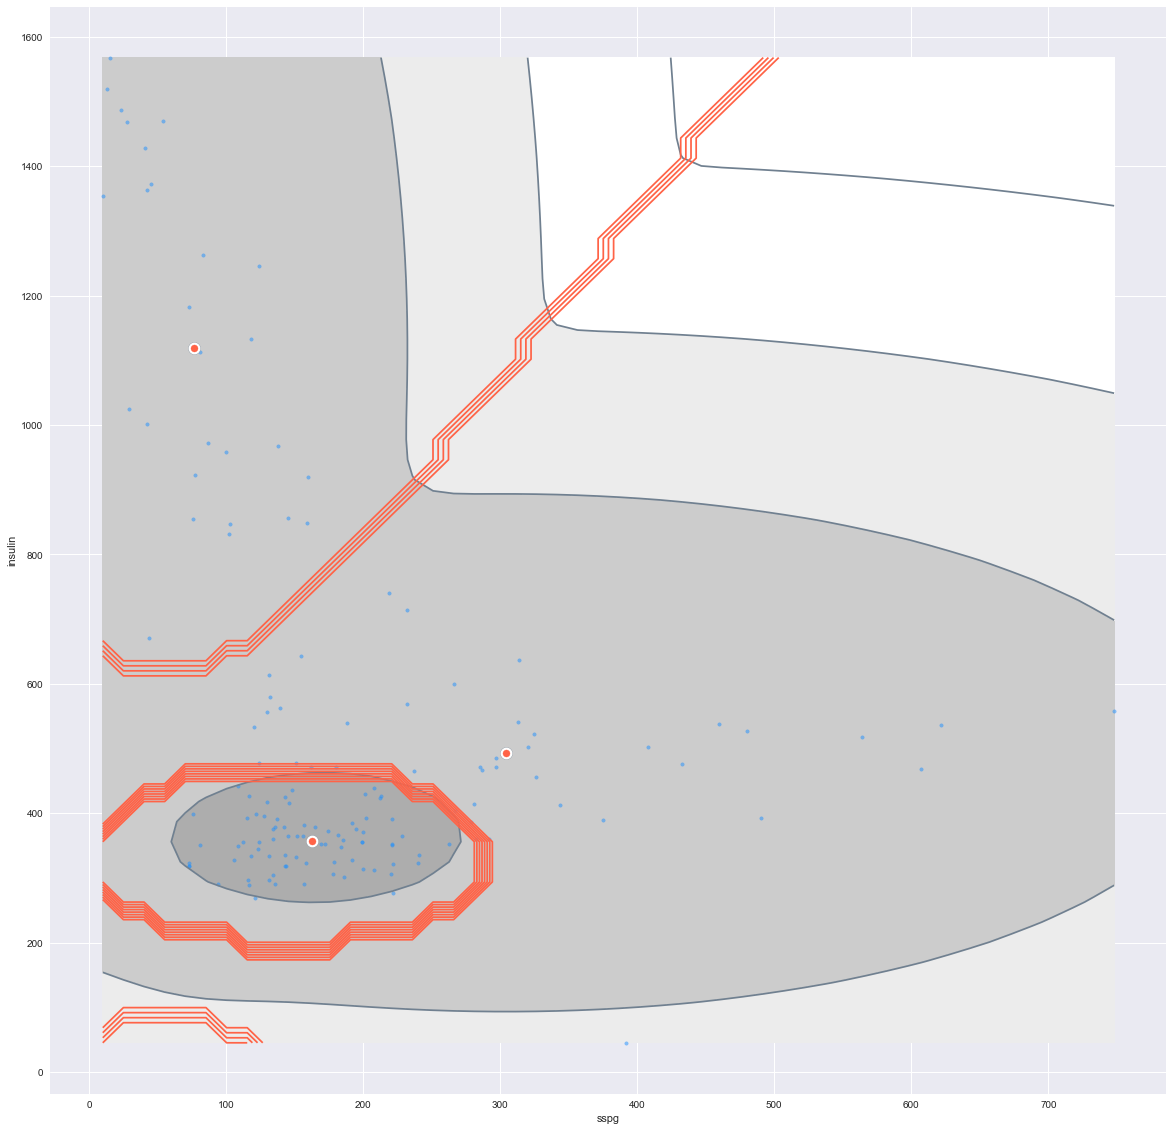

In [24]:
X = df.loc[:,['sspg','insulin']]
model = GaussianMixture(n_components=3, covariance_type='diag', random_state=323).fit(X)
afx.plot_gaussian_ellipses(model,X=X)

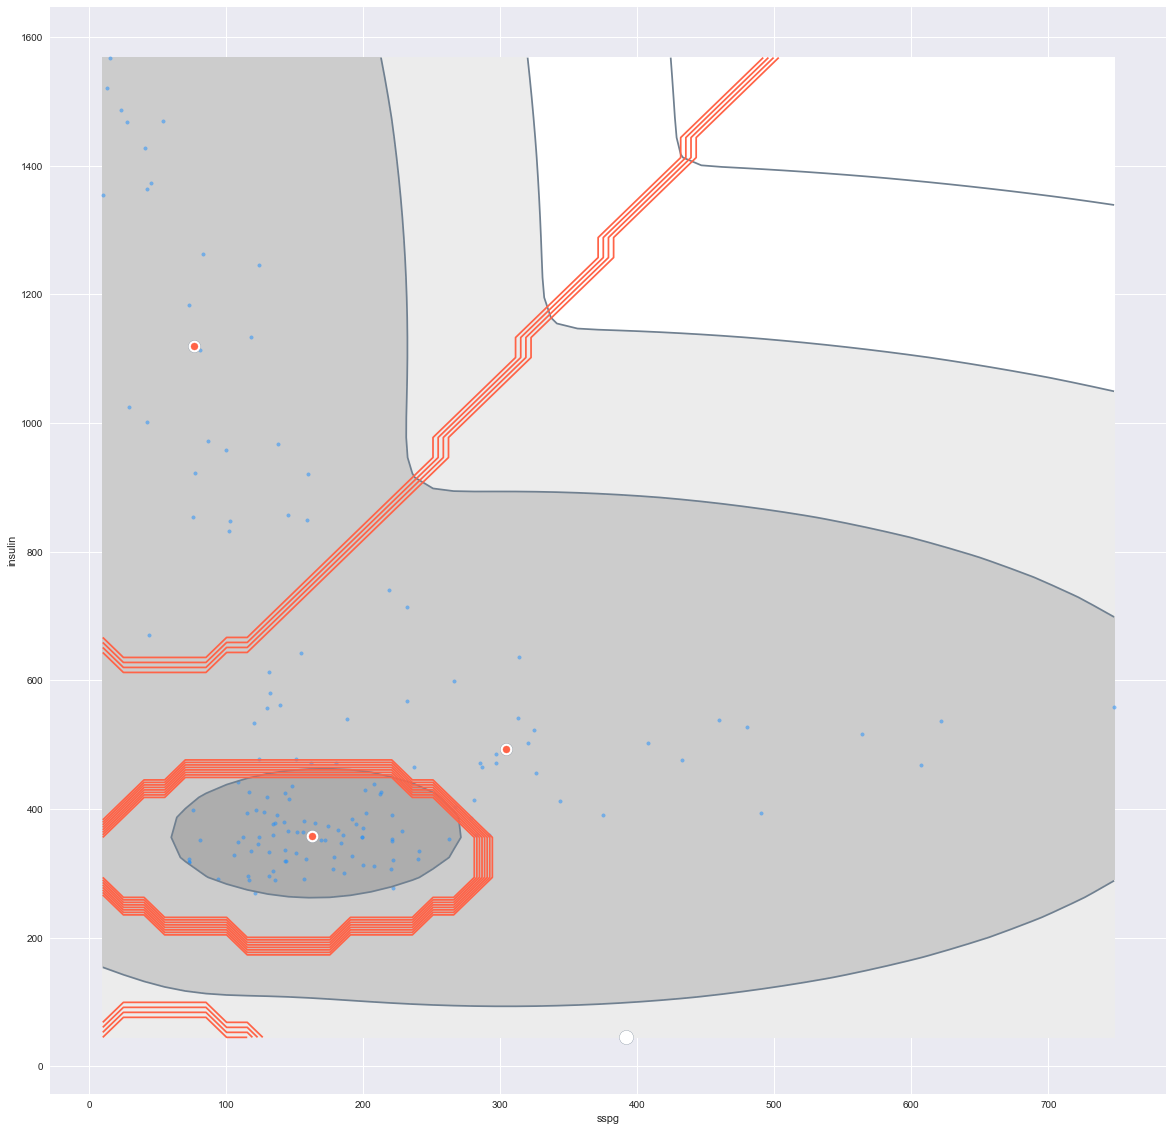

In [25]:
X = df.loc[:,['sspg','insulin']]
model = GaussianMixture(n_components=3, covariance_type='diag', random_state=323).fit(X)
afx.plot_gaussian_ellipses(model,X=X)
X = np.array(X)
densities = model.score_samples(X)
threshold = np.percentile(densities,.5)
anomalies = X[densities < threshold]
plt.scatter(anomalies[:,0], anomalies[:,1], color='seagreen', marker='s',s=25)
plt.scatter(anomalies[:,0], anomalies[:,1], edgecolors='slategrey',facecolor='white',marker='o',s=200)

In [26]:
anomalies

array([[392,  45]], dtype=int64)

In [28]:
print(model.predict([anomalies[0]]))

[2]


In [29]:
df.query('sspg== {} and insulin == {}'.format(anomalies[0][0],anomalies[0][1]))

,class,glucose,insulin,sspg,y
103,Chemical,75,45,392,0
